In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

## to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Step 1: Load the dataset
def load_dataset():
    dataset_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
    iris = pd.read_csv(dataset_url)
    return iris

# Step 2: Preprocess and clean the dataset
def preprocess_dataset(data):
    # Handle missing values (if any)
    data.dropna(inplace=True)
    
    # Convert categorical columns to numeric (if applicable)
    if 'species' in data.columns:
        data['species'] = data['species'].astype('category').cat.codes
    
    return data

# Load and preprocess the dataset
iris_data = load_dataset()
iris_data = preprocess_dataset(iris_data)

# Display first few rows to verify
print(iris_data.head())

# Step 3: Basic Statistics
def basic_statistics(data):
    print("\nBasic Statistics:")
    print(data.describe())
    
    # Skewness and kurtosis
    for col in data.select_dtypes(include=[np.number]).columns:
        print(f"{col} - Skewness: {skew(data[col]):.2f}, Kurtosis: {kurtosis(data[col]):.2f}")
    
    # Correlation
    print("\nCorrelation Matrix:")
    print(data.corr())
    
basic_statistics(iris_data)

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

Basic Statistics:
       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.90

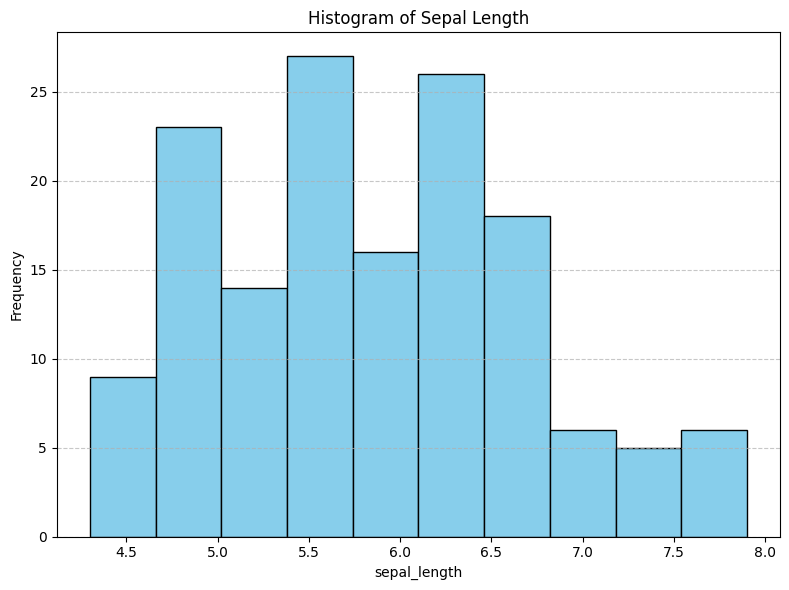

In [13]:
# Plotting function for a histogram
def plot_histogram(data, column, title="Histogram of Sepal Length", bins=10):
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=bins, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Generate the histogram
plot_histogram(iris_data, 'sepal_length')

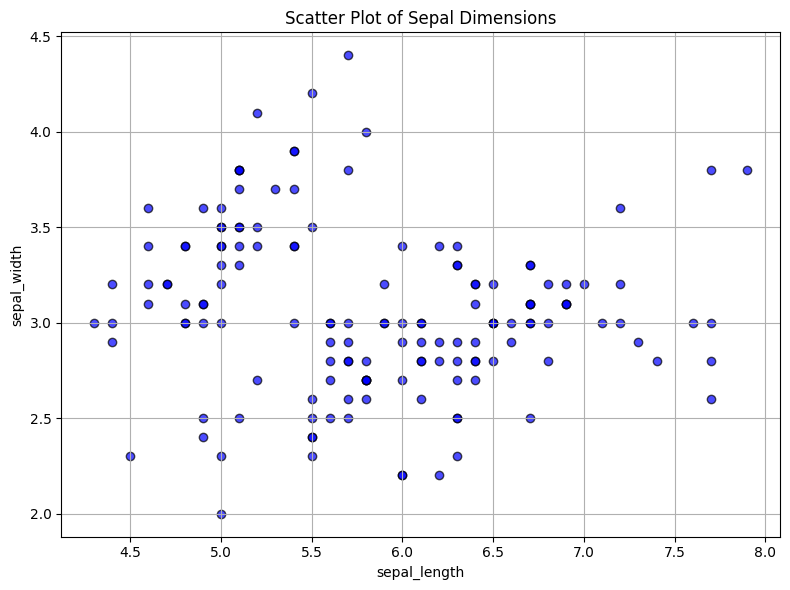

In [14]:
# Scatter plot function
def plot_scatter(data, x_col, y_col, title="Scatter Plot of Sepal Dimensions"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], c='blue', alpha=0.7, edgecolor='k')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate the scatter plot
plot_scatter(iris_data, 'sepal_length', 'sepal_width')

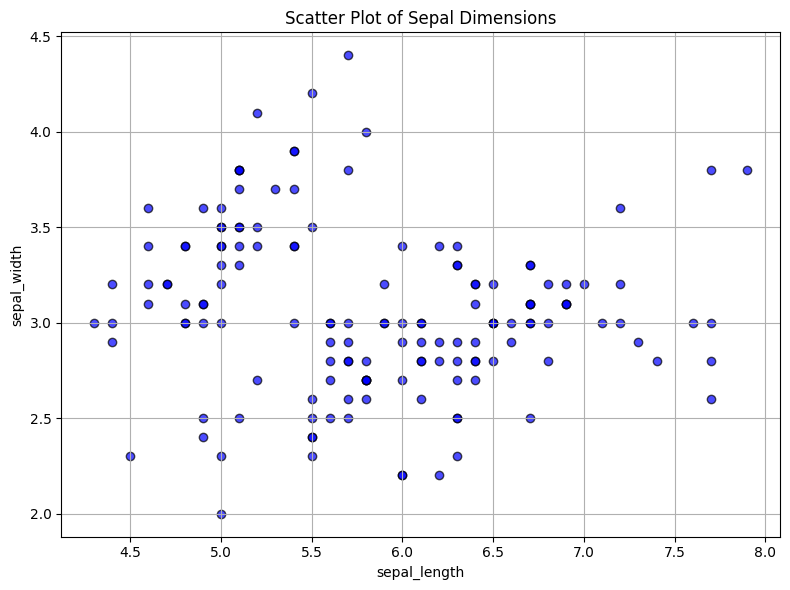

In [12]:
# Scatter plot function
def plot_scatter(data, x_col, y_col, title="Scatter Plot of Sepal Dimensions"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], c='blue', alpha=0.7, edgecolor='k')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate the scatter plot
plot_scatter(iris_data, 'sepal_length', 'sepal_width')

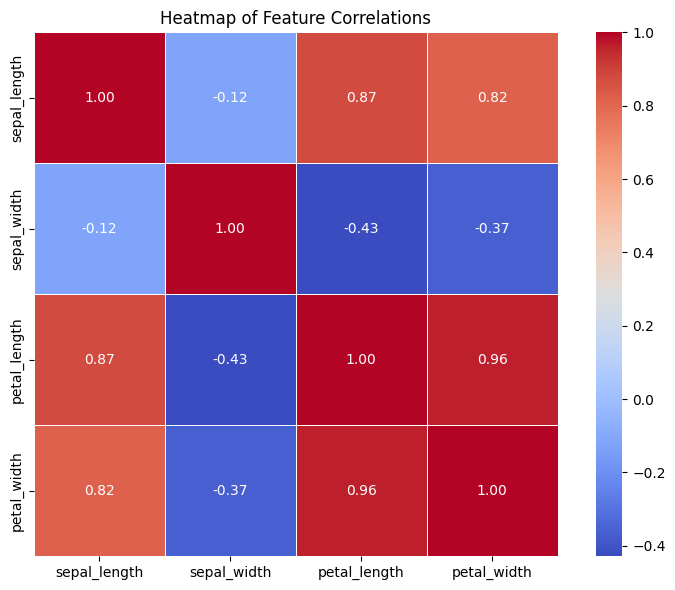

In [22]:
# Function to create a heatmap of the correlation matrix
def create_heatmap(data, title="Heatmap of Feature Correlations"):
    plt.figure(figsize=(8, 6))
    
    # Compute the correlation matrix
    correlation_matrix = data.corr()
    
    # Create the heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap="coolwarm", 
        fmt=".2f", 
        linewidths=0.5, 
        square=True
    )
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Generate the heatmap
create_heatmap(clustered_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

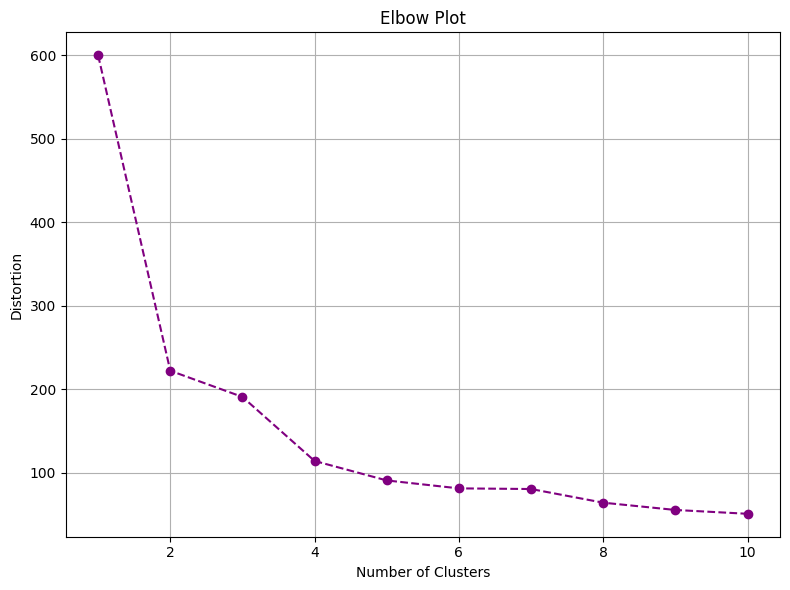

In [16]:
# Function to generate an elbow plot
def plot_elbow(data, max_clusters=10):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.iloc[:, :-1])
    
    distortions = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters+1), distortions, marker='o', linestyle='--', color='purple')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate the elbow plot
plot_elbow(iris_data)

In [17]:
# Function for K-Means clustering
def kmeans_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.iloc[:, :-1])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)
    
    return data, kmeans

# Perform clustering
clustered_data, kmeans_model = kmeans_clustering(iris_data)
print(clustered_data[['sepal_length', 'sepal_width', 'Cluster']].head())

   sepal_length  sepal_width  Cluster
0           5.1          3.5        1
1           4.9          3.0        2
2           4.7          3.2        2
3           4.6          3.1        2
4           5.0          3.6        1


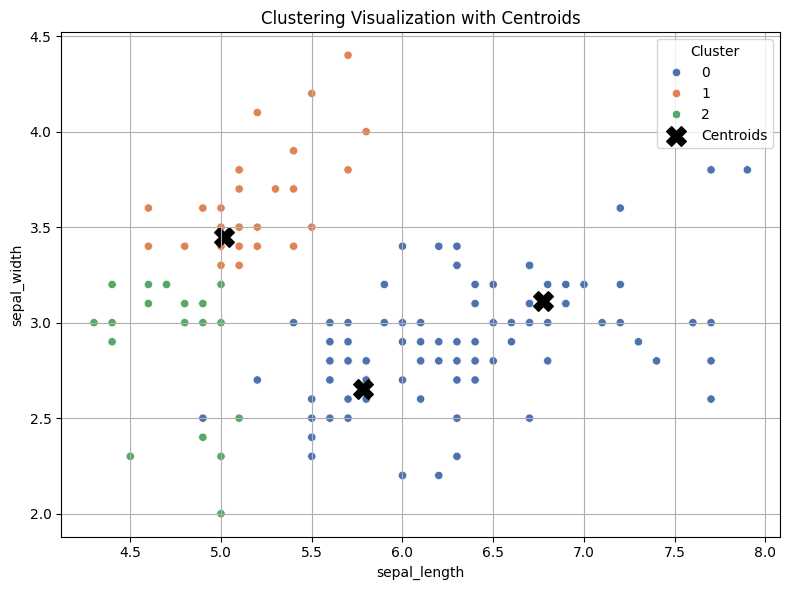

In [21]:
# Function to visualize clustering with centroids
def visualize_clusters_with_centroids(data, x_col, y_col, cluster_col, kmeans_model, scaler, title="Clustering Visualization with Centroids"):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of data points
    sns.scatterplot(
        x=data[x_col], 
        y=data[y_col], 
        hue=data[cluster_col], 
        palette='deep', 
        legend='full'
    )
    
    # Unscale centroids to original data space
    centroids = scaler.inverse_transform(kmeans_model.cluster_centers_)  # Convert centroids back to original scale
    
    # Plot centroids on the same feature space
    plt.scatter(
        centroids[:, data.columns.get_loc(x_col)],  # X-coordinates of centroids
        centroids[:, data.columns.get_loc(y_col)],  # Y-coordinates of centroids
        s=200, 
        c='black', 
        label='Centroids', 
        marker='X'
    )
    
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Cluster', loc='best')
    plt.show()

# Scale data for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustered_data[['sepal_length', 'sepal_width']])

# Fit KMeans model to scaled data
kmeans_model.fit(scaled_features)

# Visualize clusters with centroids
visualize_clusters_with_centroids(
    clustered_data, 
    'sepal_length', 
    'sepal_width', 
    'Cluster', 
    kmeans_model, 
    scaler
)

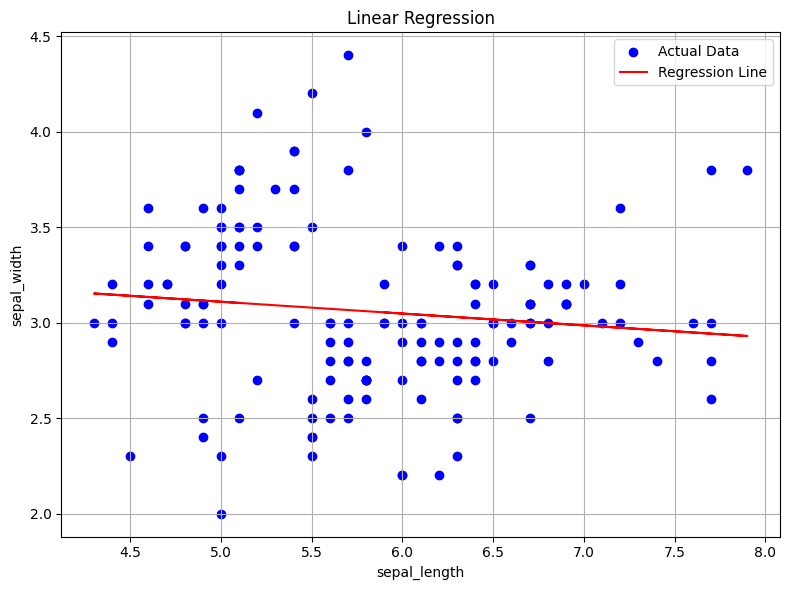

In [18]:
# Linear regression function
def linear_regression(data, x_col, y_col):
    X = data[[x_col]].values
    y = data[y_col].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.title('Linear Regression')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Perform regression
linear_regression(iris_data, 'sepal_length', 'sepal_width')